In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

In [2]:
df = pd.read_csv('campus_raw/pose0.csv', header=None)

def normalization(x):
    x = np.array(x)
    return (x - min(x)) / (max(x) - min(x))

def str2xyz_v1(s):
    if not isinstance(s, str):
        return s
    # s = [x for x in s.split(']') if x]
    # s = [x.replace('[', '') for x in s]
    # s = [x.replace('\n', '') for x in s]
    # s = [x.split() for x in s]
    # s = [list(map(eval, x)) for x in s]
    # s = np.array(s)
    
    s = s.replace('[', '').replace(']', '').replace('\n', '')
    s = s.split()
    s = list(map(eval, s))
    # s = np.array(s)
    return s

for column in df.columns:
    df[column] = df[column].apply(str2xyz_v1)
    
df['x0'] = df[0].apply(lambda x: x[:17] if not isinstance(x, float) else x)
df['x1'] = df[1].apply(lambda x: x[:17] if not isinstance(x, float) else x)
df['x2'] = df[2].apply(lambda x: x[:17] if not isinstance(x, float) else x)
df['x3'] = df[3].apply(lambda x: x[:17] if not isinstance(x, float) else x)
# df['x3'] = df[3].map(lambda x: x[:17], na_action='ignore')
df['x'] = df['x0'].fillna("").apply(list) + df['x1'].fillna("").apply(list) + \
            df['x2'].fillna("").apply(list) + df['x3'].fillna("").apply(list)

df['y0'] = df[0].apply(lambda x: x[17:34] if not isinstance(x, float) else x)
df['y1'] = df[1].apply(lambda x: x[17:34] if not isinstance(x, float) else x)
df['y2'] = df[2].apply(lambda x: x[17:34] if not isinstance(x, float) else x)
df['y3'] = df[3].apply(lambda x: x[17:34] if not isinstance(x, float) else x)
df['y'] = df['y0'].fillna("").apply(list) + df['y1'].fillna("").apply(list) + \
            df['y2'].fillna("").apply(list) + df['y3'].fillna("").apply(list)

df['z0'] = df[0].apply(lambda x: x[34:] if not isinstance(x, float) else x)
df['z1'] = df[1].apply(lambda x: x[34:] if not isinstance(x, float) else x)
df['z2'] = df[2].apply(lambda x: x[34:] if not isinstance(x, float) else x)
df['z3'] = df[3].apply(lambda x: x[34:] if not isinstance(x, float) else x)
df['z'] = df['z0'].fillna("").apply(list) + df['z1'].fillna("").apply(list) + \
            df['z2'].fillna("").apply(list) + df['z3'].fillna("").apply(list)

df['x'] = df['x'].apply(normalization)
df['y'] = df['y'].apply(normalization)
df['z'] = df['z'].apply(normalization)

df.drop(columns=[f'x{i}' for i in range(4)], inplace=True)
df.drop(columns=[f'y{i}' for i in range(4)], inplace=True)
df.drop(columns=[f'z{i}' for i in range(4)], inplace=True)

df['tmp'] = df.apply(lambda x: np.stack([x['x'], x['y'], x['z']]), axis=1)

df.drop(columns=['x', 'y', 'z'], inplace=True)

df[0] = df['tmp'].map(lambda x: x[:, :17])
df[1] = df['tmp'].map(lambda x: x[:, 17:34] if x.shape[1]>17 else np.nan)
df[2] = df['tmp'].map(lambda x: x[:, 34:51] if x.shape[1]>34 else np.nan)
df[3] = df['tmp'].map(lambda x: x[:, 51:] if x.shape[1]>51 else np.nan)

df.drop(columns=['tmp'], inplace=True)

for column in df.columns:
    df[column] = df[column].apply(lambda x: x.reshape([3,17]) if not isinstance(x, float) else x)
    df[column] = df[column].apply(str)

df.replace('nan','').to_csv('campus_raw/newpose0.csv', na_rep="", header=False, index=False)

df.head()

,0,1,2,3
0,[[0.16608881 0.16608881 0.16608881 0.16608881 ...,[[0.4947608 0.4947608 0.4947608 0.4947608 ...,[[0.84940989 0.84940989 0.84940989 0.84940989 ...,[[0.75042427 0.75042427 0.75042427 0.75042427 ...
1,[[0.18965362 0.18965362 0.18965362 0.18965362 ...,[[0.70328129 0.70328129 0.70328129 0.70328129 ...,[[0.48575434 0.48575434 0.48575434 0.48575434 ...,[[0.81805643 0.81805643 0.81805643 0.81805643 ...
2,[[0.19086023 0.19086023 0.19086023 0.19086023 ...,[[0.47781227 0.47781227 0.47781227 0.47781227 ...,[[0.6354927 0.6354927 0.6354927 0.6354927 ...,[[0.77901109 0.77901109 0.77901109 0.77901109 ...
3,[[0.4485347 0.4485347 0.4485347 0.4485347 ...,[[0.2079546 0.2079546 0.2079546 0.2079546 ...,[[0.61172436 0.61172436 0.61172436 0.61172436 ...,[[0.76163403 0.76163403 0.76163403 0.76163403 ...
4,[[0.53979148 0.53979148 0.53979148 0.53979148 ...,[[0.37690931 0.37690931 0.37690931 0.37690931 ...,[[0.11645158 0.11645158 0.11645158 0.11645158 ...,[[0.75173448 0.75173448 0.75173448 0.75173448 ...


In [3]:
df = pd.read_csv('campus_raw/newpose0.csv', header=None)

def str2xyz(s):
    if not isinstance(s, str):
        return s
    s = [x for x in s.split(']') if x]
    s = [x.replace('[', '') for x in s]
    s = [x.replace('\n', '') for x in s]
    s = [x.split() for x in s]
    s = [list(map(eval, x)) for x in s]
    s = np.array(s)
    
    # s = s.replace('[', '').replace(']', '').replace('\n', '')
    # s = s.split()
    # s = list(map(eval, s))
    # s = np.array(s)
    return s

for column in df.columns:
    df[column] = df[column].apply(str2xyz)
    
df.head()

,0,1,2,3
0,"[[0.16608881, 0.16608881, 0.16608881, 0.166088...","[[0.4947608, 0.4947608, 0.4947608, 0.4947608, ...","[[0.84940989, 0.84940989, 0.84940989, 0.849409...","[[0.75042427, 0.75042427, 0.75042427, 0.750424..."
1,"[[0.18965362, 0.18965362, 0.18965362, 0.189653...","[[0.70328129, 0.70328129, 0.70328129, 0.703281...","[[0.48575434, 0.48575434, 0.48575434, 0.485754...","[[0.81805643, 0.81805643, 0.81805643, 0.818056..."
2,"[[0.19086023, 0.19086023, 0.19086023, 0.190860...","[[0.47781227, 0.47781227, 0.47781227, 0.477812...","[[0.6354927, 0.6354927, 0.6354927, 0.6354927, ...","[[0.77901109, 0.77901109, 0.77901109, 0.779011..."
3,"[[0.4485347, 0.4485347, 0.4485347, 0.4485347, ...","[[0.2079546, 0.2079546, 0.2079546, 0.2079546, ...","[[0.61172436, 0.61172436, 0.61172436, 0.611724...","[[0.76163403, 0.76163403, 0.76163403, 0.761634..."
4,"[[0.53979148, 0.53979148, 0.53979148, 0.539791...","[[0.37690931, 0.37690931, 0.37690931, 0.376909...","[[0.11645158, 0.11645158, 0.11645158, 0.116451...","[[0.75173448, 0.75173448, 0.75173448, 0.751734..."


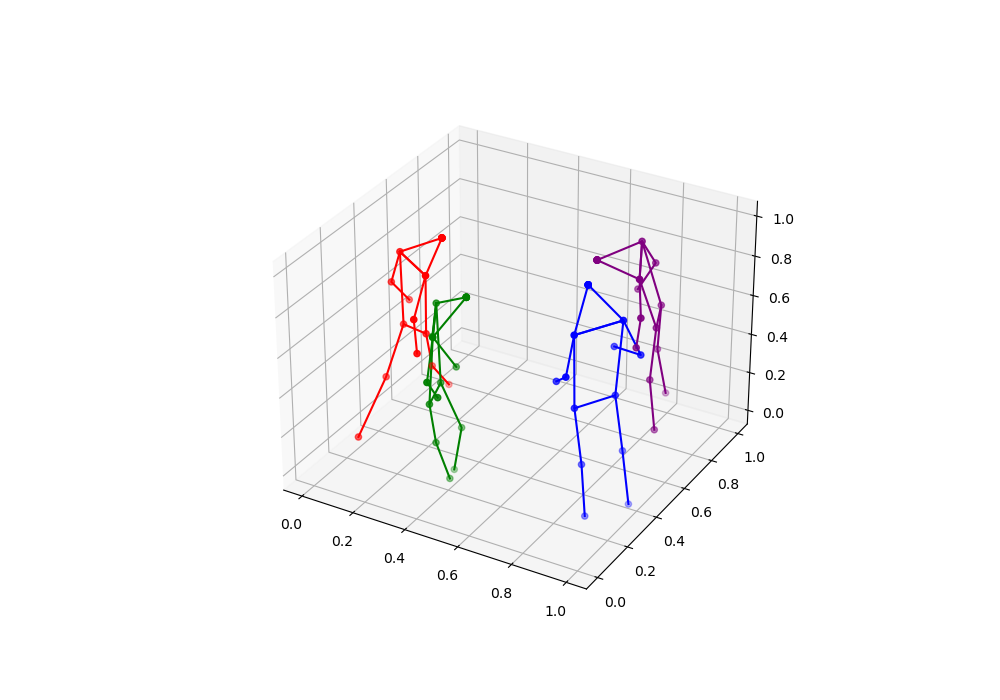

In [4]:
%matplotlib widget
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

colors = ['red', 'purple', 'green', 'blue']
for i, xyz in enumerate(df.iloc[1]):
    
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    color = colors[i]
    
    ax.scatter3D(x, y, z, color=color)
    
    # head [0,1,2,3,4]
    ax.plot(x[:5],
            y[:5],
            z[:5],
            ls='-', color=color)
    
     # neck, node [0,5,6]
    ax.plot(np.hstack((x[5], x[6], x[0], x[5])),
            np.hstack((y[5], y[6], y[0], y[5])),
            np.hstack((z[5], z[6], z[0], z[5])),
            ls='-', color=color)
    
    # body, node [5,6,11,12]
    ax.plot(np.hstack((x[5], x[6], x[12], x[11], x[5])),
            np.hstack((y[5], y[6], y[12], y[11], y[5])),
            np.hstack((z[5], z[6], z[12], z[11], z[5])),
            ls='-', color=color)
    
    # right arm, node [6,8,10]
    ax.plot(np.hstack((x[6], x[8], x[10])),
            np.hstack((y[6], y[8], y[10])),
            np.hstack((z[6], z[8], z[10])),
            ls='-', color=color)

    # left arm, node [5,7,9]
    ax.plot(np.hstack((x[5], x[7], x[9])),
            np.hstack((y[5], y[7], y[9])),
            np.hstack((z[5], z[7], z[9])),
            ls='-', color=color)
    
    # left leg, node [11, 13, 15]
    ax.plot(np.hstack((x[11], x[13], x[15])),
            np.hstack((y[11], y[13], y[15])),
            np.hstack((z[11], z[13], z[15])),
            ls='-', color=color)
    
    # right leg
    ax.plot(np.hstack((x[12], x[14], x[16])),
            np.hstack((y[12], y[14], y[16])),
            np.hstack((z[12], z[14], z[16])),
            ls='-', color=color)
    
plt.show()